In [13]:
from skimage.measure import block_reduce
import numpy as np

import logging
import matplotlib.gridspec as gridspec
from utils import logging as lg
lg.set_logging(logging.ERROR)
from model import provider, heatmap_evaluation
import matplotlib.pyplot as plt

from notebook_utils import plot 
import config

import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)

In [14]:
from utils import data_provider

In [15]:
dataset_loader = data_provider.DatasetLoader(data_dir='../data')

## Compare_explaination_for_models

In [ ]:
def compare_explaination_for_models(method='lrp_deep_taylor', models=['s2', 's3'], seq=7, dataset='mnist', data_idx=[]):
    dataset = dataset_loader.load(dataset)
    n = 20
    if len(data_idx) > 0:
        x, y = dataset.test2d.x[data_idx, :, :], dataset.test2d.y[data_idx, :]
    else:
        x, y = dataset.get_samples_for_vis(n=n)
        
    targets = np.argmax(y, axis=1)
    models = [None]+models
    total_models = len(models)

    fig = plt.figure(figsize=(2, 1))

    outer = gridspec.GridSpec(total_models, 1)

    pred_heatmaps = dict()
    actual_models = list(filter(lambda x: x, models))
    model_info = dict()
    for model in actual_models:
        model_obj = provider.load(model)
        pred_heatmaps[model] = getattr(model_obj, 'rel_%s' % method)(x, y)
        model_info[model] = model_obj._
    count = 1
    for i in range(total_models):

        model = models[i]
        fig = plt.figure(figsize=(1.66*x.shape[0], 2))
        

        for j in range(x.shape[0]):
            plt.subplot(total_models, x.shape[0], count)

            if model is not None:
                heatmap = pred_heatmaps[model][1][j, :, :]

                heatmap = heatmap / (np.abs(heatmap).max() + 1e-10)


                heatmap = plot.make_rgb_heatmap(heatmap)
                title = '%s : %s' % (method, model)

                pred_idx = pred_heatmaps[model][0][j]

                plt.title('Pred %s(%d)' % (dataset.get_text_label(pred_idx), pred_idx))
                cmap = None
                alpha= 0.2 if pred_idx != targets[j] else 1
                suptitle = '%s\n(acc=%.4f)' % (model, model_info[model].accuracy)
            else:
                heatmap = x[j, :]
                pred_idx = pred_heatmaps[actual_models[0]][0][j]

                cmap = 'gist_gray'
                title = '%s(%d)' % (dataset.get_text_label(targets[j]), targets[j])
                plt.title(title)
                alpha = 1
                suptitle = '%s' % method

            plt.imshow(heatmap, cmap=cmap, alpha=alpha)
            plt.xticks([])
            plt.yticks([])
            count = count + 1

        plt.suptitle(suptitle)

    plt.show()
    
def compare_explaination_for_dataset(method, models, dataset, seq, data_idx):
    
    compare_explaination_for_models(method,
                                    seq=seq,
                                    dataset=dataset,
                                    models=[ '../final-models/%s_network-%s-seq-%d' % (m, dataset, seq) for m in models],
                                    data_idx=data_idx
                                   )


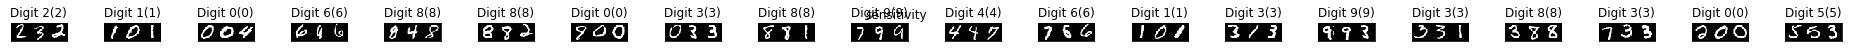

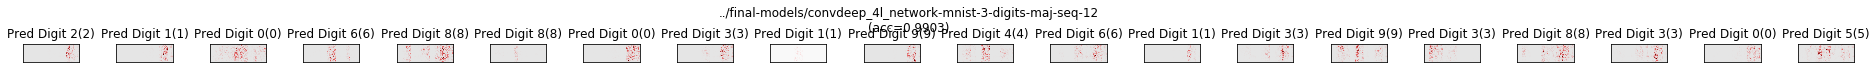

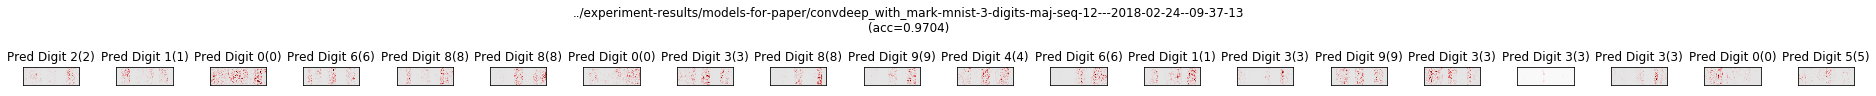

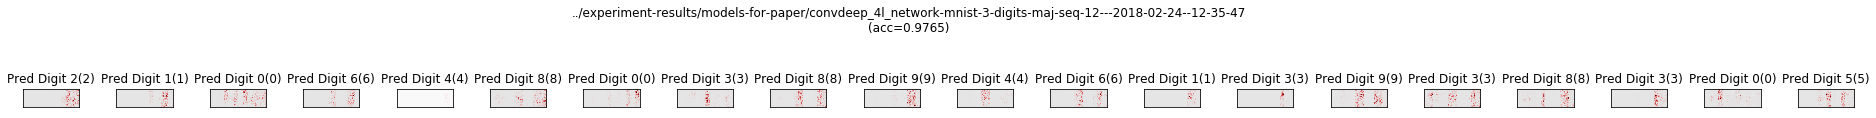

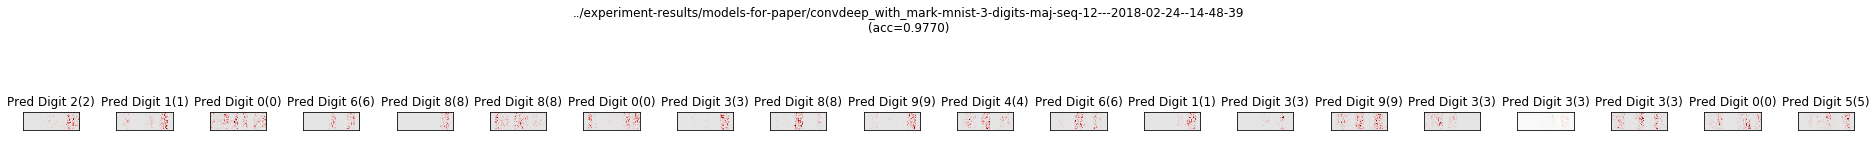

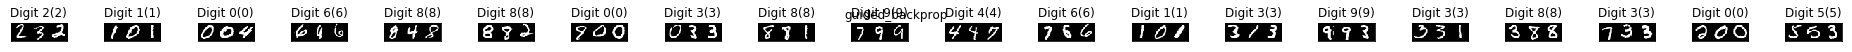

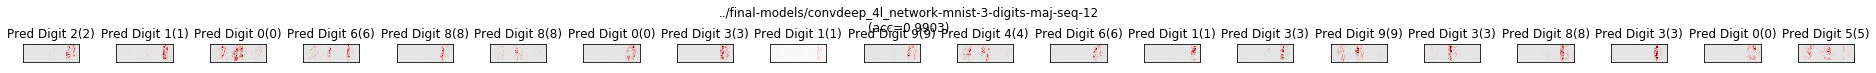

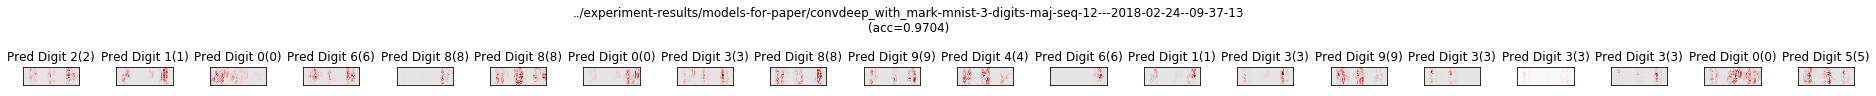

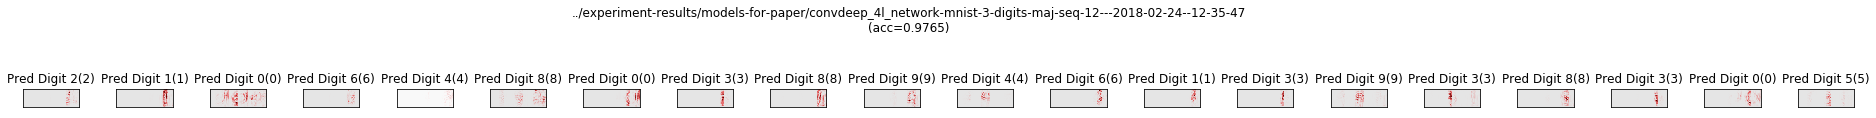

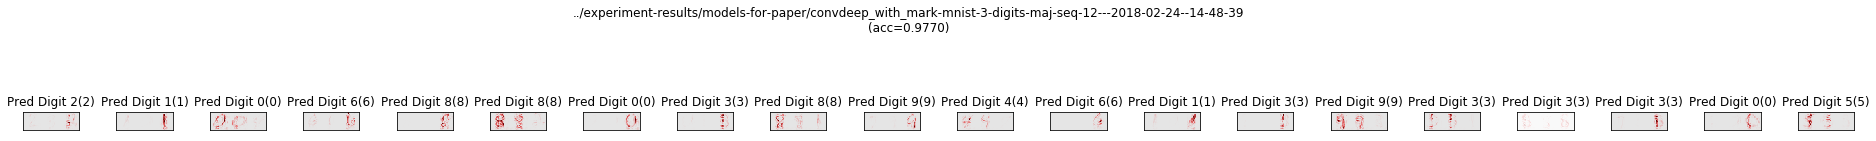

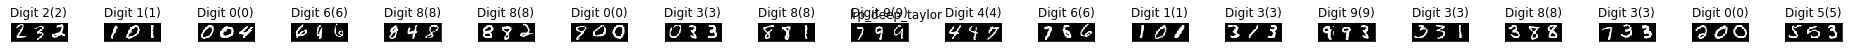

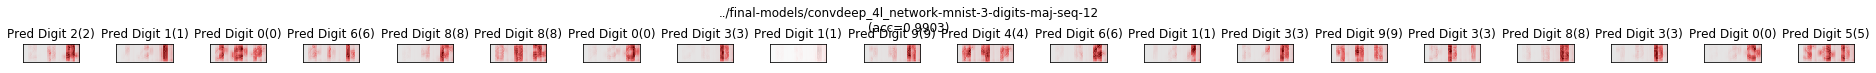

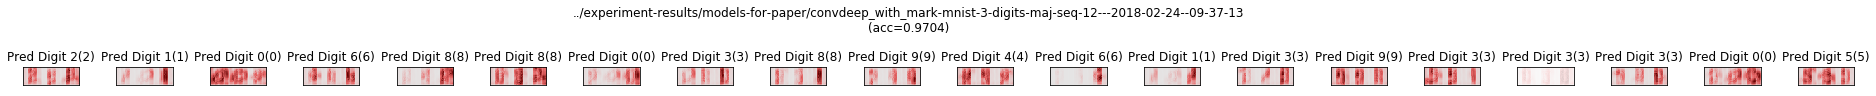

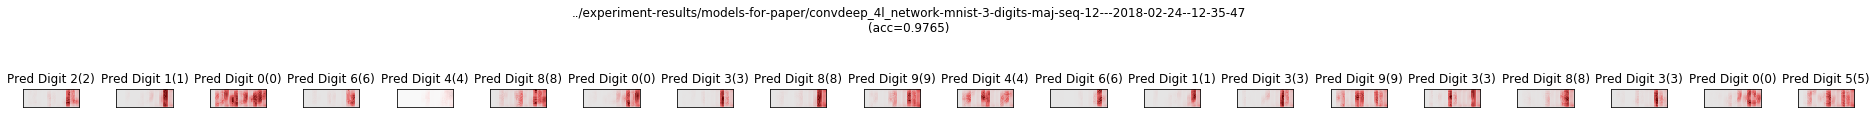

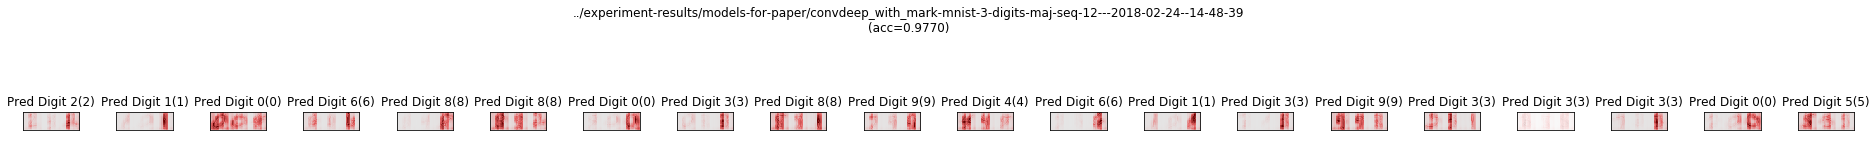

In [19]:
for m in ['sensitivity', 'guided_backprop', 'lrp_deep_taylor']:        
    compare_explaination_for_models(
        m,
        seq=12,
        dataset='mnist-3-digits-maj',
        models=[
'../final-models/convdeep_4l_network-mnist-3-digits-maj-seq-12',
# '../experiment-results/models-for-paper/convdeep_with_mark-mnist-3-digits-maj-seq-12---2018-02-24--09-03-08',
'../experiment-results/models-for-paper/convdeep_with_mark-mnist-3-digits-maj-seq-12---2018-02-24--09-37-13',
'../experiment-results/models-for-paper/convdeep_4l_network-mnist-3-digits-maj-seq-12---2018-02-24--12-35-47',
'../experiment-results/models-for-paper/convdeep_with_mark-mnist-3-digits-maj-seq-12---2018-02-24--14-48-39',
        ])

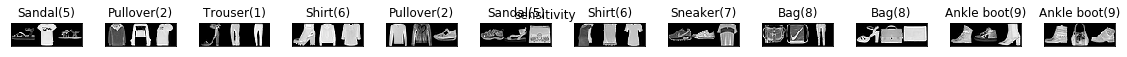

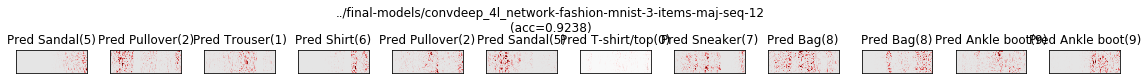

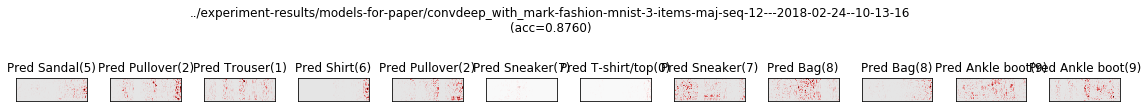

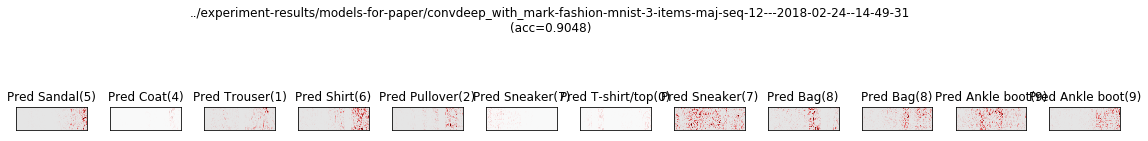

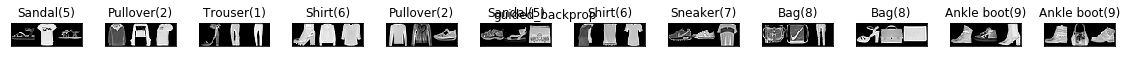

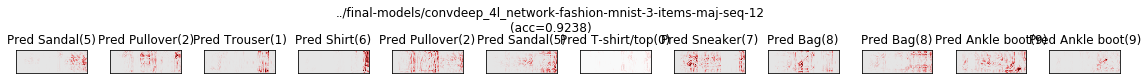

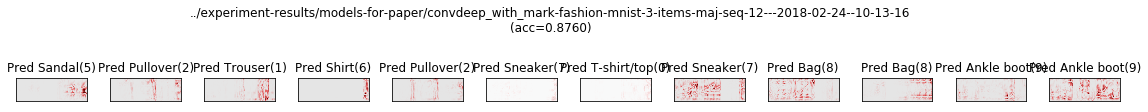

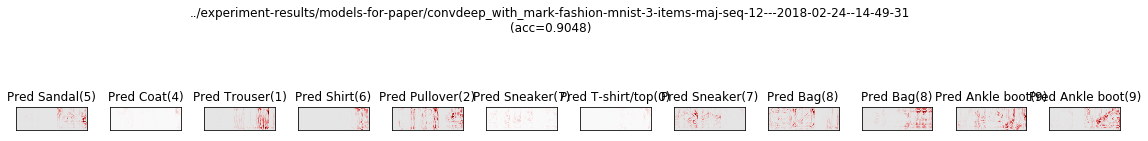

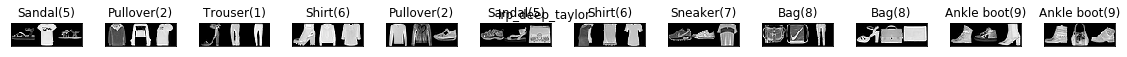

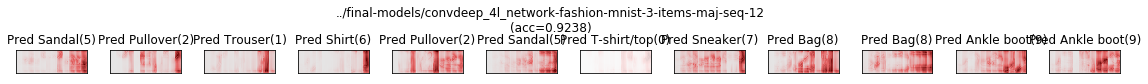

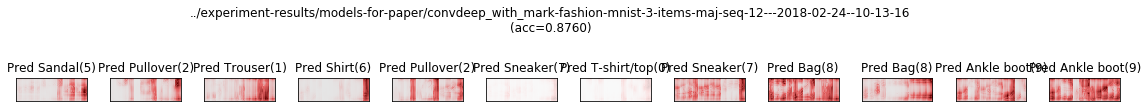

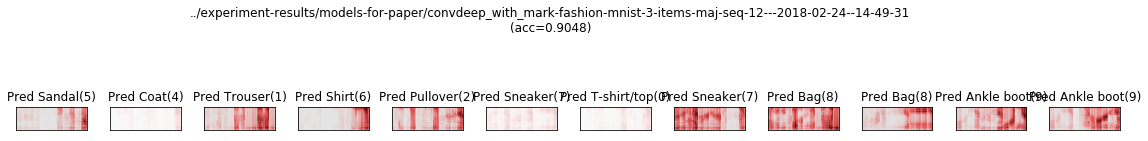

In [16]:
for m in ['sensitivity', 'guided_backprop', 'lrp_deep_taylor']:        
    compare_explaination_for_models(m,
        seq=12,
        dataset='fashion-mnist-3-items-maj',
        models=[
'../final-models/convdeep_4l_network-fashion-mnist-3-items-maj-seq-12',
'../experiment-results/models-for-paper/convdeep_with_mark-fashion-mnist-3-items-maj-seq-12---2018-02-24--10-13-16',
'../experiment-results/models-for-paper/convdeep_with_mark-fashion-mnist-3-items-maj-seq-12---2018-02-24--14-49-31'
        ])

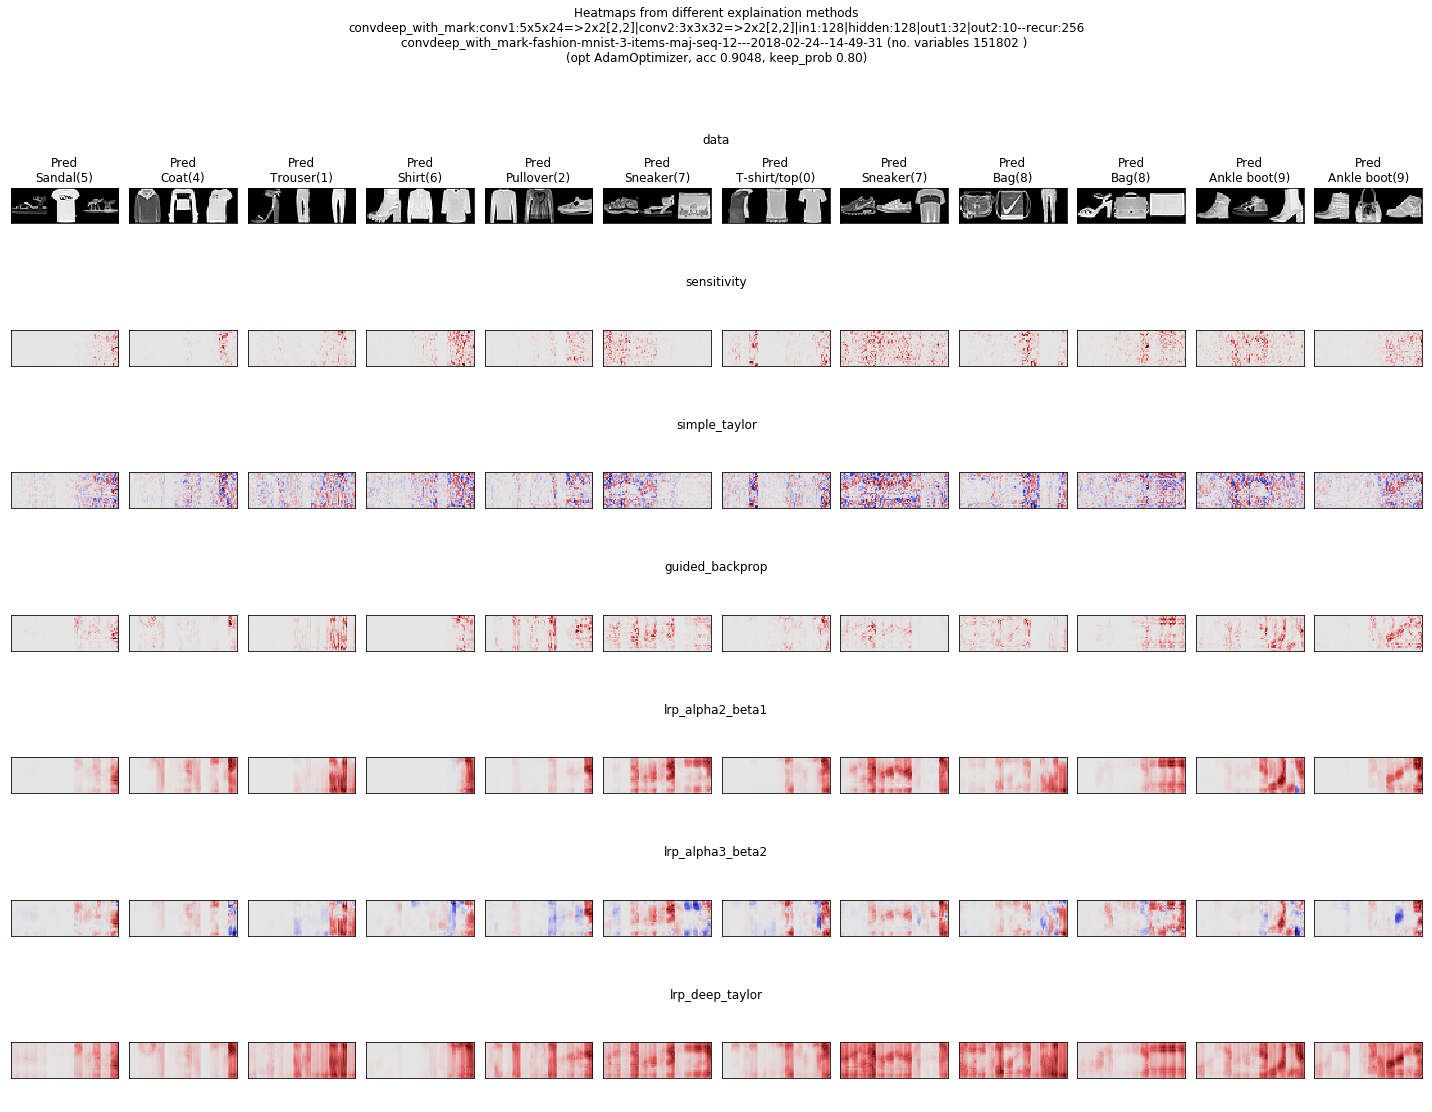

In [18]:
plot.plot_relevance_methods('../experiment-results/models-for-paper/convdeep_with_mark-fashion-mnist-3-items-maj-seq-12---2018-02-24--14-49-31',
                           dataset_loader)